# Klasyfikator SVM

## Zadanie na 3

Implementacja liniowego SVMa

#### Import bibliotek

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_moons
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import seaborn as sns
from sklearn.svm import SVC

#### Funkcje do oceny skuteczności 

In [15]:
def plot_confusion_matrix(y_true, y_pred, labels=None):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Macierz Pomyłek")
    plt.show()

def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    return accuracy, sensitivity, specificity

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Losowa klasyfikacja')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Krzywa ROC')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

def plot_dataset(X, y, title="Dataset"):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
        
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

#### Wygenerowanie danych 

make_classification

x (2599, 2)
y (2599,)


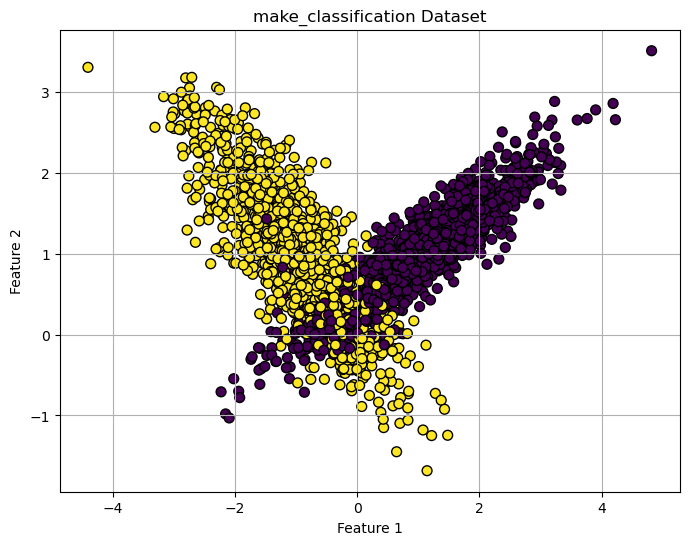

In [16]:
my_index = 259199
my_n_samples = int(str(my_index)[0]+ str(my_index)[1] + str(my_index)[-2] + str(my_index)[-1])
X_classification, y_classification = make_classification(
    n_samples=my_n_samples, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_clusters_per_class=1, 
    random_state=my_index,
)

print('x', X_classification.shape)
print('y', y_classification.shape)
plot_dataset(X_classification, y_classification, title="make_classification Dataset")

make_moons

X_moons (2599, 2)
y_moons (2599,)


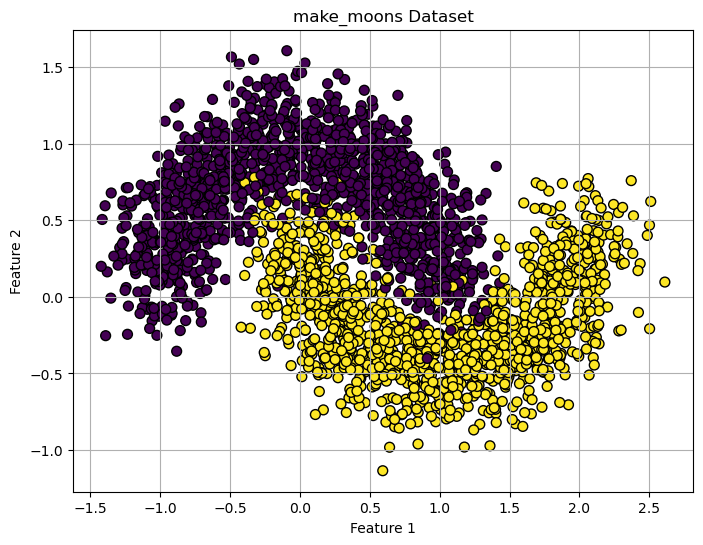

In [17]:
X_moons, y_moons = make_moons(n_samples=my_n_samples, noise=0.2, random_state=my_index)

print('X_moons', X_moons.shape)
print('y_moons', y_moons.shape)
plot_dataset(X_moons, y_moons, title="make_moons Dataset")

#### Podział danych na treningowe i testowe

In [18]:
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=my_index
)

X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(
    X_moons, y_moons, test_size=0.2, random_state=my_index
)

print('classification', X_train_classification.shape, y_train_classification.shape, X_test_classification.shape, y_test_classification.shape)
print('moons', X_train_moons.shape, y_train_moons.shape, X_test_moons.shape, y_test_moons.shape)

classification (2079, 2) (2079,) (520, 2) (520,)
moons (2079, 2) (2079,) (520, 2) (520,)


#### sklearn.svm.SVC

z kernel=’linear’

Sklearn SVC classification
Accuracy: 0.90, Sensitivity: 0.95, Specificity: 0.85


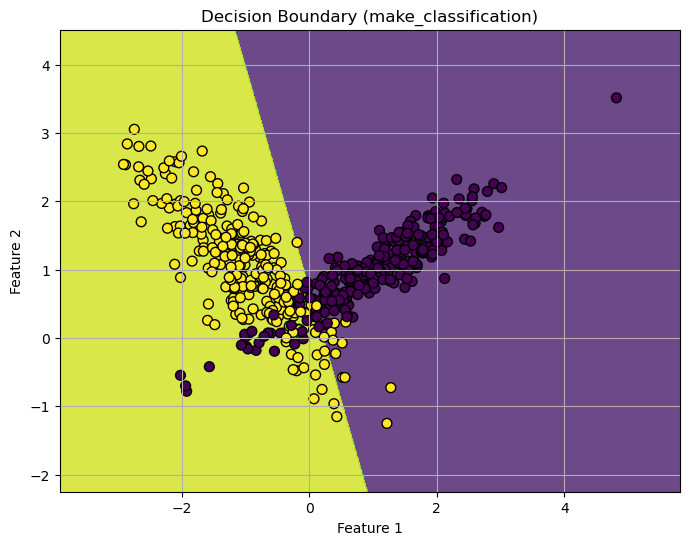

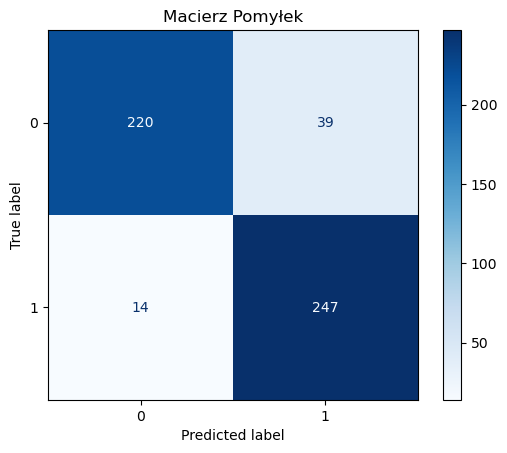

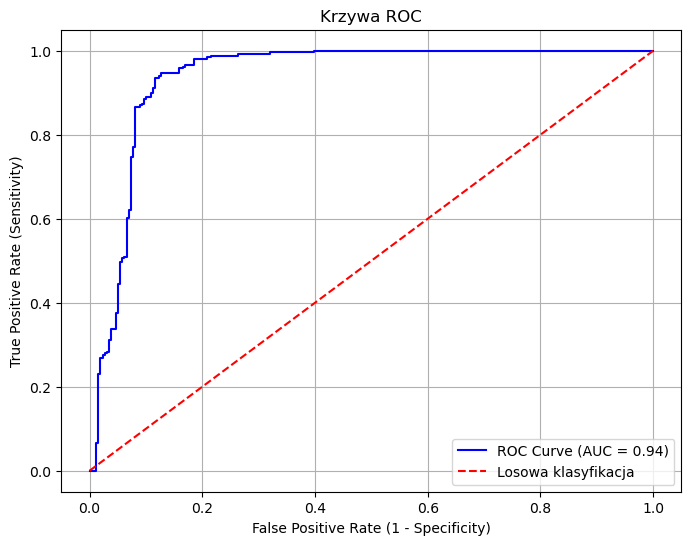

Sklearn SVC moons


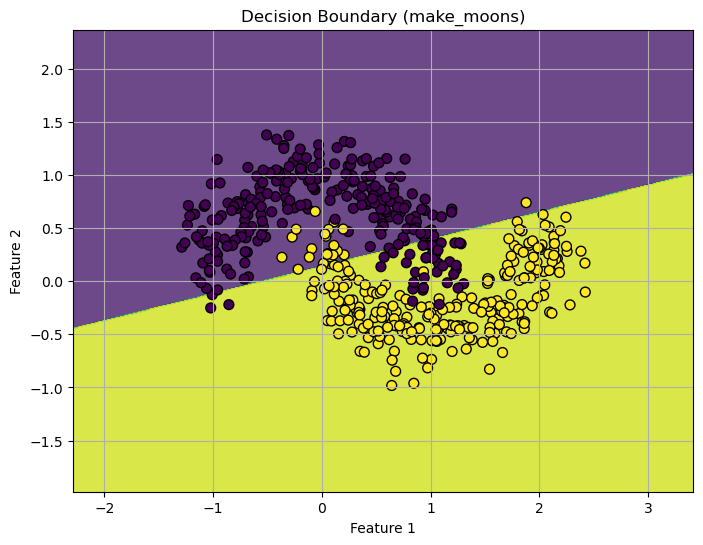

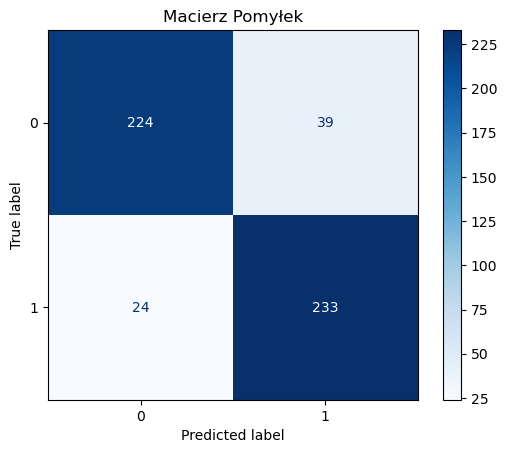

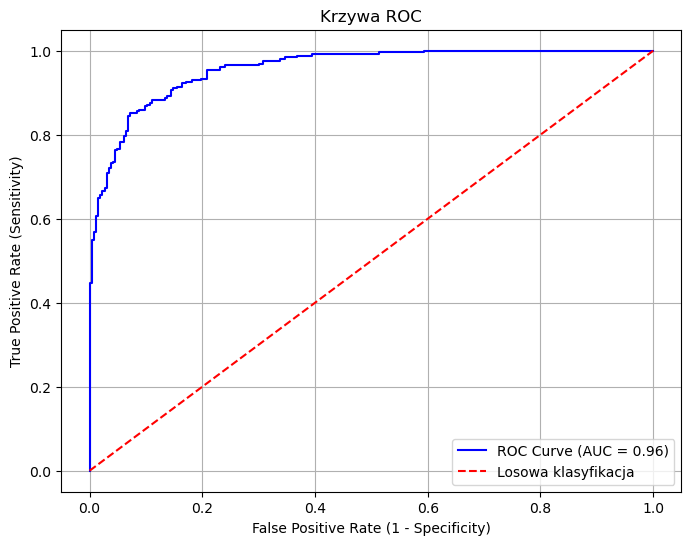

In [20]:
clf_classification = SVC(kernel='linear', random_state=my_index)
clf_classification.fit(X_train_classification, y_train_classification)
y_clf_classification = clf_classification.predict(X_test_classification)

print('Sklearn SVC classification')
accuracy, sensitivity, specificity = calculate_metrics(y_test_classification, y_clf_classification)
print(f"Accuracy: {accuracy:.2f}, Sensitivity: {sensitivity:.2f}, Specificity: {specificity:.2f}")
plot_decision_boundary(clf_classification, X_test_classification, y_test_classification, title="Decision Boundary (make_classification)")
plot_confusion_matrix(y_test_classification, y_clf_classification, labels=[0, 1])
plot_roc_curve(y_test_classification, clf_classification.decision_function(X_test_classification))

clf_moons = SVC(kernel='linear', random_state=my_index)
clf_moons.fit(X_train_moons, y_train_moons)
y_clf_moons = clf_moons.predict(X_test_moons)

print('Sklearn SVC moons')
accuracy, sensitivity, specificity = calculate_metrics(y_test_moons, y_clf_moons)
plot_decision_boundary(clf_moons, X_test_moons, y_test_moons, title="Decision Boundary (make_moons)")
plot_confusion_matrix(y_test_moons, y_clf_moons, labels=[0, 1])
plot_roc_curve(y_test_moons, clf_moons.decision_function(X_test_moons))

## Zadanie na 4

Implementacja SVMa wykorzystującego funkcję jądra

## Zadanie na 5

Analiza zbioru SDSS17 w oparciu o SVM

#### Pobranie danych 

Zbiór Stellar Classification Dataset - SDSS17

In [ ]:
file_path = f'./datasets/star_classification_SDSS17.csv'
data = pd.read_csv(file_path)

data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


#### Usunięcie kolumn 

’cam_col’, ’MJD’ oraz te kończące się na ’_ID’

In [ ]:
columns_to_drop = ['cam_col', 'MJD'] + [col for col in data.columns if col.endswith('_ID')]
data_cleaned = data.drop(columns=columns_to_drop)

data_cleaned.head()

,alpha,delta,u,g,r,i,z,class,redshift,plate
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794,5812
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136,10445
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195,4576
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346,9149
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123,6121


#### Odseparowanie kolumny z wartością przewidywaną

Podział na x i y

In [21]:
X = data_cleaned.drop(columns=['class'])
y = data_cleaned['class']

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Unique classes in y:", np.unique(y))

X shape: (100000, 9)
y shape: (100000,)
Unique classes in y: ['GALAXY' 'QSO' 'STAR']


#### Imputacja brakujących wartości

- zmienne kategoryczne należy zastąpić dominantą 
- dane numeryczne należy zastąpić medianą

In [ ]:
missing_values_before = X.isnull().sum()


if missing_values_before.sum() > 0:
    categorical_columns = X.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        mode_value = X[col].mode()[0]
        X[col].fillna(mode_value, inplace=True)

    numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_columns:
        median_value = X[col].median()
        X[col].fillna(median_value, inplace=True)

missing_values_after = X.isnull().sum()
comparison_table = pd.DataFrame({
    'Column': X.columns,
    'Missing Before': missing_values_before.values,
    'Missing After': missing_values_after.values
})

print(comparison_table)
print('y missing: ', y.isnull().sum())

     Column  Missing Before  Missing After
0     alpha               0              0
1     delta               0              0
2         u               0              0
3         g               0              0
4         r               0              0
5         i               0              0
6         z               0              0
7  redshift               0              0
8     plate               0              0
y missing:  0


#### Macierz korelacji cech

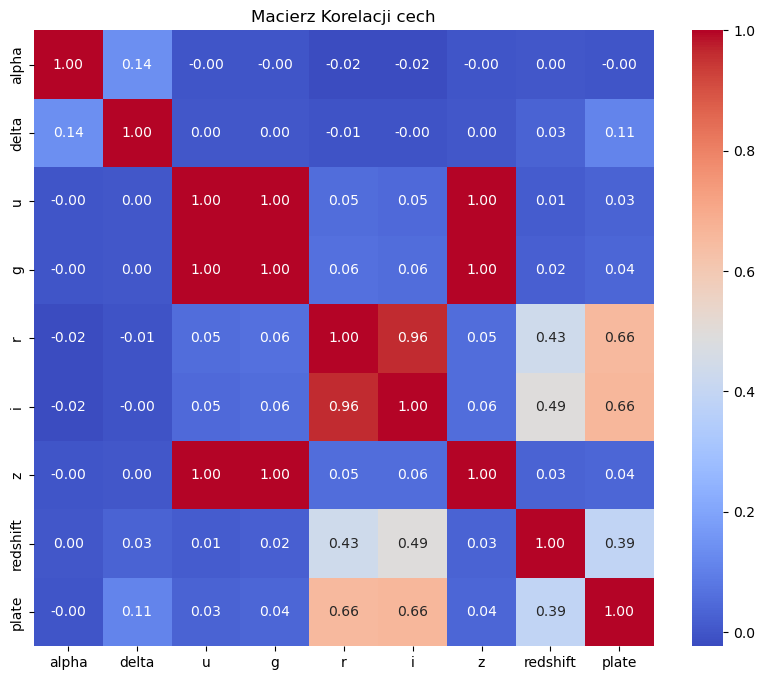

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Macierz Korelacji cech")
plt.show()